**k-means Clustering**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import haversine_distances
from math import radians
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%pip install folium
import folium
from folium import plugins
from folium.plugins import HeatMap

C:\Users\Thanh\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
original_data = pd.read_csv('processed_dataframe.csv')
original_data = original_data.fillna(0)

In [3]:
#City centre for distance calculation
chicago_centre = [41.881832, -87.623177]
chicago_centre_rad = [radians(_) for _ in chicago_centre]

In [4]:
#Distance between each Station and City centre
original_data["start_dist_centre"] = original_data.apply(lambda x: (haversine_distances([[radians(_) for _ in chicago_centre], [radians(_) for _ in [x.start_lat,x.start_lng]]]))[0][1] * 6371000/1000, axis = 1)
original_data["end_dist_centre"] = original_data.apply(lambda x: (haversine_distances([[radians(_) for _ in chicago_centre], [radians(_) for _ in [x.end_lat,x.end_lng]]]))[0][1] * 6371000/1000, axis = 1)

In [5]:
#Distance between stations / netdistance (in km)
original_data["distance"] = original_data.apply(lambda x: (haversine_distances([[radians(_) for _ in [x.end_lat,x.end_lng]], [radians(_) for _ in [x.start_lat,x.start_lng]]]))[0][1] * 6371000/1000, axis = 1)

In [6]:
data = original_data[[
    "avg_temp",
    "hour",
    "month",
    #"start_dist_centre",
    #"end_dist_centre",
    #"bike_id",
    "distance",
    "trip_duration_min"]].copy()

In [7]:
data['avg_temp']=data['avg_temp'].astype(float)
data['hour']=data['hour'].astype(float)
data['month']=data['month'].astype(float)
#data['start_station_id']=data['start_station_id'].astype(float)
#data['end_station_id']=data['end_station_id'].astype(float)
# data['bike_id']=data['bike_id'].astype(float)
data['trip_duration_min']=data['trip_duration_min'].astype(float)
data['distance']=data['distance'].astype(float)

In [8]:
# data.sort_values(by = "start_station_id", inplace=True)
data.head()

,avg_temp,hour,month,distance,trip_duration_min
0,2.5,0.0,1.0,1.787966,6.0
1,2.5,0.0,1.0,0.942257,7.0
2,2.5,0.0,1.0,2.717795,14.0
3,2.5,0.0,1.0,5.876562,30.0
4,2.5,0.0,1.0,0.951965,6.0


In [9]:
data["distance"] = data["distance"].fillna(0)

In [10]:
data

,avg_temp,hour,month,distance,trip_duration_min
0,2.5,0.0,1.0,1.787966,6.0
1,2.5,0.0,1.0,0.942257,7.0
2,2.5,0.0,1.0,2.717795,14.0
3,2.5,0.0,1.0,5.876562,30.0
4,2.5,0.0,1.0,0.951965,6.0
...,...,...,...,...,...
3817999,-2.8,23.0,12.0,4.025265,20.0
3818000,-2.8,23.0,12.0,0.000000,26.0
3818001,-2.8,23.0,12.0,1.467796,9.0
3818002,-2.8,23.0,12.0,1.467796,9.0


In [11]:
data["distance"] = data["distance"].fillna(0)
data = data[np.isfinite(data).all(1)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818004 entries, 0 to 3818003
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   avg_temp           float64
 1   hour               float64
 2   month              float64
 3   distance           float64
 4   trip_duration_min  float64
dtypes: float64(5)
memory usage: 174.8 MB


In [12]:
data.head()

,avg_temp,hour,month,distance,trip_duration_min
0,2.5,0.0,1.0,1.787966,6.0
1,2.5,0.0,1.0,0.942257,7.0
2,2.5,0.0,1.0,2.717795,14.0
3,2.5,0.0,1.0,5.876562,30.0
4,2.5,0.0,1.0,0.951965,6.0


**Data Prep and Scaling** 

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)
sample = data.sample(n=1000)
data_scaled = scaler.transform(sample)
data_scaled_df = pd.DataFrame(sample, columns=data.columns, index=sample.index)
# data_scaled_df.sort_values(by = "start_station_id", inplace = True)
data_scaled_df.head()

,avg_temp,hour,month,distance,trip_duration_min
1222198,18.30,11.0,6.0,1.824066,8.0
2266778,23.60,13.0,8.0,5.843723,24.0
1233412,14.70,16.0,6.0,1.704424,29.0
2410297,21.95,17.0,8.0,3.396333,25.0
581041,13.90,16.0,4.0,0.877571,7.0


In [14]:
z_scaled = data_scaled_df
three_scaled = data_scaled_df
four_scaled = data_scaled_df
five_scaled = data_scaled_df
z_scaled

,avg_temp,hour,month,distance,trip_duration_min
1222198,18.30,11.0,6.0,1.824066,8.0
2266778,23.60,13.0,8.0,5.843723,24.0
1233412,14.70,16.0,6.0,1.704424,29.0
2410297,21.95,17.0,8.0,3.396333,25.0
581041,13.90,16.0,4.0,0.877571,7.0
...,...,...,...,...,...
1861169,20.00,13.0,7.0,0.000000,56.0
1914747,28.30,22.0,7.0,1.295819,7.0
86525,-10.60,18.0,1.0,0.864386,8.0
15508,2.80,16.0,1.0,1.459498,12.0


**--------**

In [15]:
k_max = 100 # since the k=100 clustering will return 100 single-element clusters 

In [16]:
clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(data_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)

C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

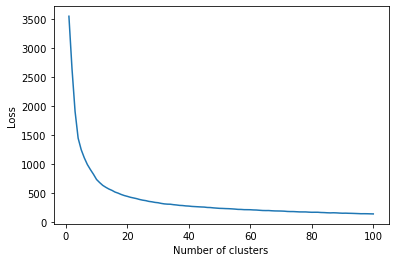

In [17]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

This loss function's "elbow" (as mentioned rule of thumb during the lecture) number of clusters could be determined between 7-14. 
For ease of interpretation we will investigate the result of ascending no. of clusters. 

In [18]:
# refit algorithm
k_means = KMeans(n_clusters=2)
k_means.fit(data_scaled)

k_3 = KMeans(n_clusters=3)
k_3.fit(data_scaled)

k_4 = KMeans(n_clusters=4)
k_4.fit(data_scaled)

k_5 = KMeans(n_clusters=6)
k_5.fit(data_scaled)


# match records to clusters by calling predict
k_means.predict(data_scaled)
k_3.predict(data_scaled)
k_4.predict(data_scaled)
k_5.predict(data_scaled)


C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

array([2, 0, 5, 0, 5, 2, 5, 3, 4, 1, 5, 0, 0, 5, 0, 4, 0, 4, 3, 3, 3, 3,
       5, 2, 5, 3, 1, 3, 0, 0, 0, 2, 3, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 5, 1, 2, 2, 2, 5, 5, 3, 5, 0, 0, 2, 0, 0,
       2, 1, 5, 5, 2, 3, 0, 3, 0, 3, 2, 0, 0, 5, 5, 0, 2, 3, 2, 0, 0, 5,
       3, 2, 2, 3, 5, 5, 0, 0, 0, 0, 0, 3, 0, 3, 5, 2, 2, 4, 0, 0, 0, 4,
       4, 2, 3, 4, 0, 3, 5, 2, 3, 5, 0, 0, 0, 0, 4, 5, 3, 3, 1, 1, 5, 4,
       2, 2, 0, 1, 0, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 0, 3, 2, 5, 5, 2, 2,
       0, 3, 2, 2, 4, 4, 2, 0, 0, 0, 5, 0, 3, 2, 5, 0, 4, 0, 2, 3, 0, 5,
       0, 0, 4, 5, 2, 0, 3, 3, 4, 2, 1, 2, 0, 2, 0, 0, 3, 0, 3, 2, 2, 0,
       0, 4, 0, 5, 0, 0, 0, 2, 2, 0, 0, 2, 4, 0, 4, 2, 0, 0, 5, 5, 5, 0,
       2, 5, 2, 1, 2, 5, 2, 4, 0, 1, 3, 5, 2, 4, 2, 4, 4, 3, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 3, 2, 0, 5, 2, 4, 0, 0, 2, 2, 0, 0, 1,
       2, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 5, 3, 0, 5, 0, 0, 0, 0, 3, 2, 0,
       4, 1, 1, 5, 2, 2, 2, 4, 3, 5, 5, 2, 5, 0, 3,

In [19]:
numbers = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"]
z_scaled["clusters"] = k_means.predict(data_scaled)
#three_scaled["clusters"] = k_3.predict(data_scaled)
#four_scaled["clusters"] = k_4.predict(data_scaled)
#five_scaled["clusters"] = k_5.predict(data_scaled)

**k=2 cluster interpretation**

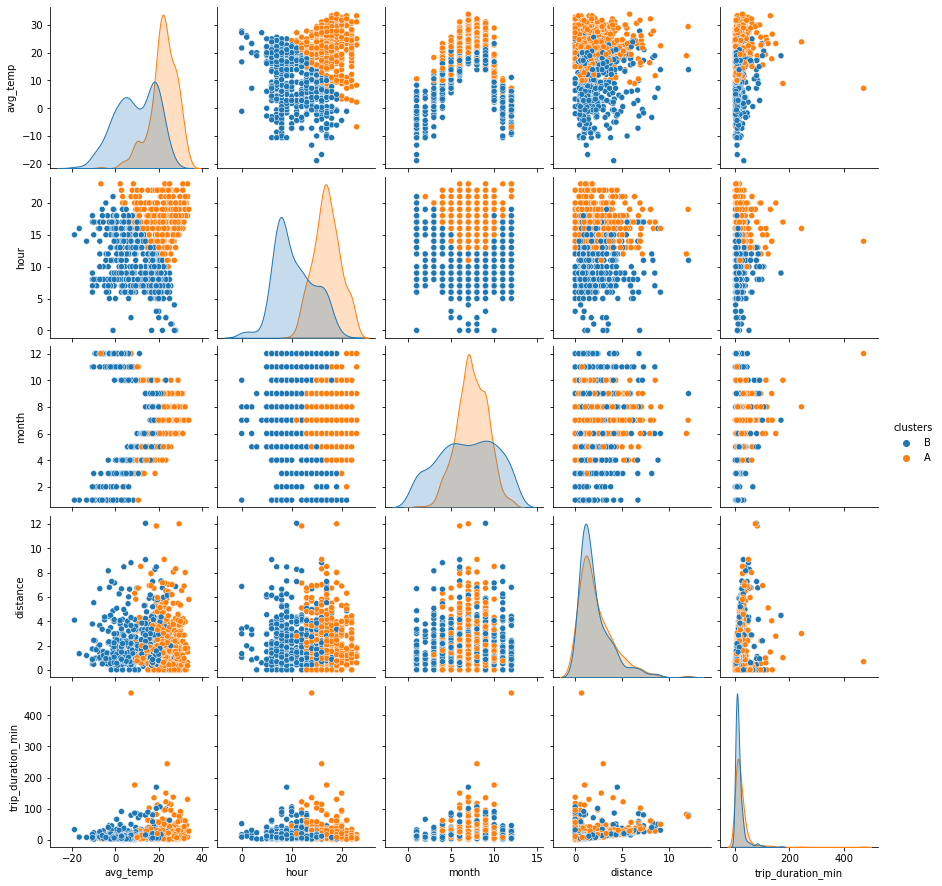

In [20]:
z_scaled["clusters"] = k_means.predict(data_scaled)
z_scaled["clusters"] = z_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=z_scaled, hue="clusters")

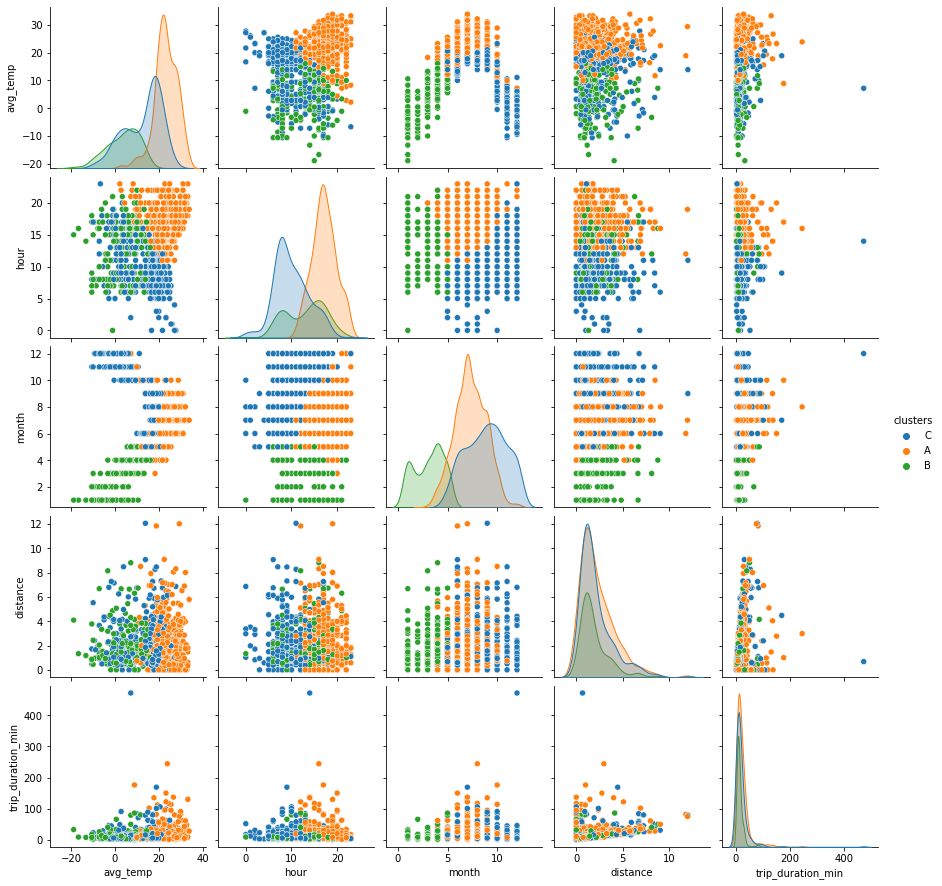

In [21]:
three_scaled["clusters"] = k_3.predict(data_scaled)
three_scaled["clusters"] = three_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=three_scaled, hue="clusters")

**k=4 clusters**

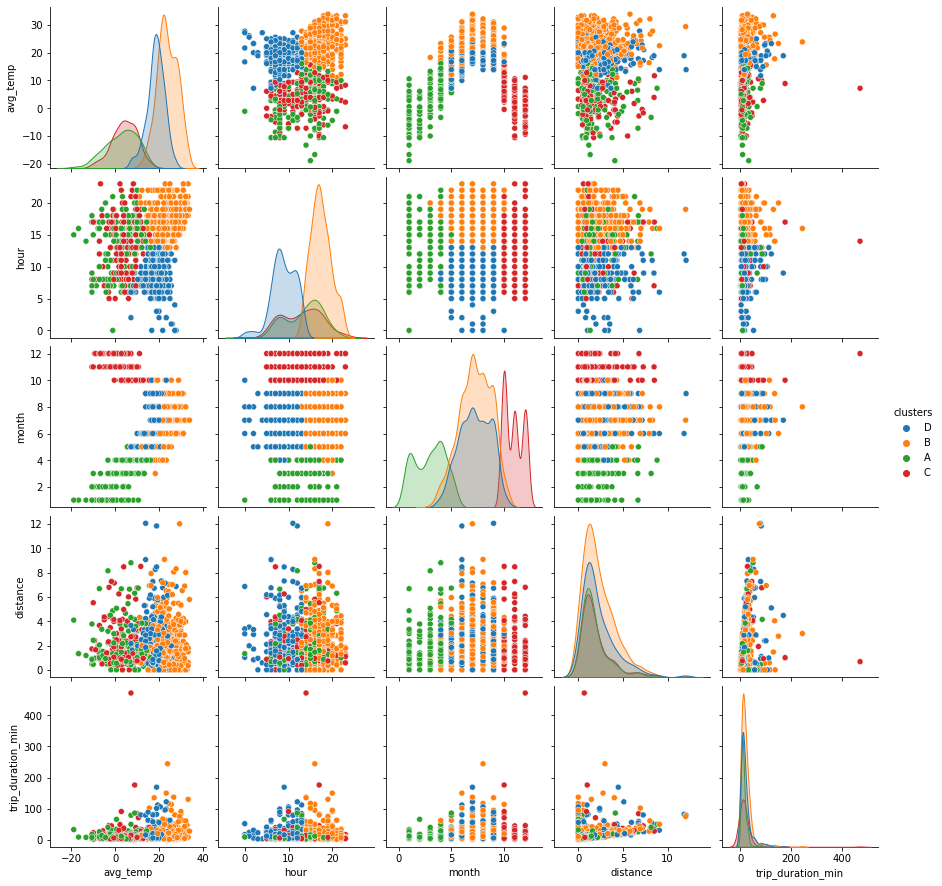

In [22]:
four_scaled["clusters"] = k_4.predict(data_scaled)
four_scaled["clusters"] = four_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=four_scaled, hue="clusters")

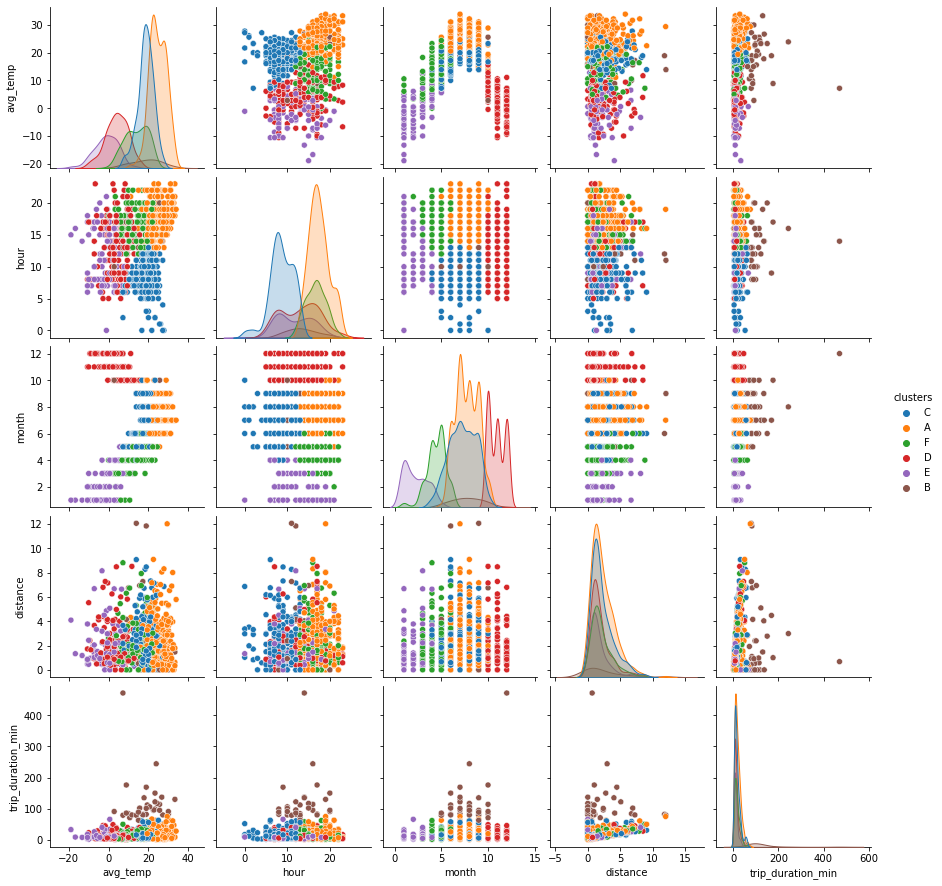

In [23]:
five_scaled["clusters"] = k_5.predict(data_scaled)
five_scaled["clusters"] = five_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=five_scaled, hue="clusters")

***Hierarchical Clustering***

In [24]:
#hierarch_sample = data.sample(n=200)
#hierarch_data_scaled = scaler.transform(hierarch_sample)

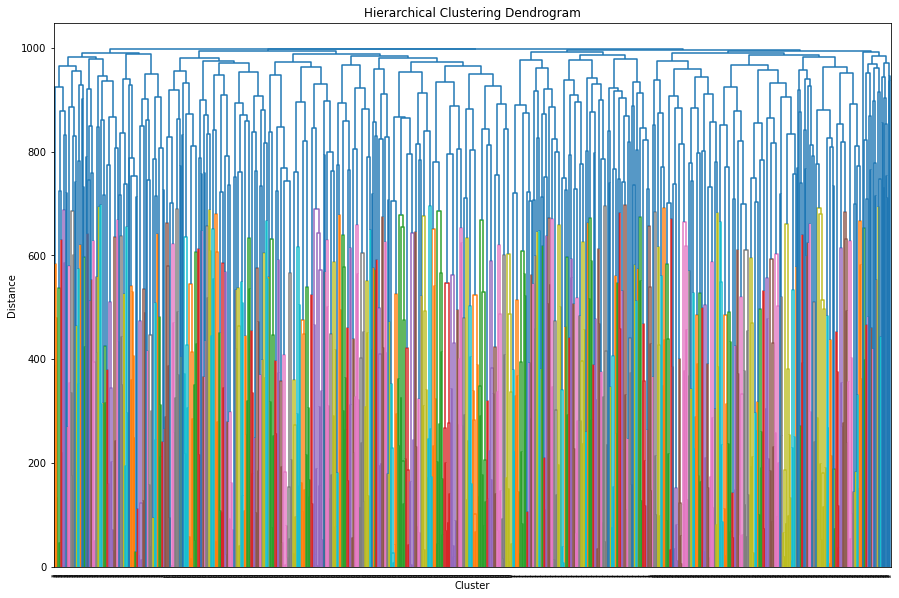

In [25]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


agglo = AgglomerativeClustering(n_clusters=4) #The number of clusters to find
y_pred_agglo = agglo.fit_predict(data_scaled)

plt.figure(figsize=(15,10))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agglo, labels=agglo.labels_)
plt.ylabel("Distance")
plt.xlabel("Cluster")
plt.show()

In [26]:
z_scaled["Agglo"] = y_pred_agglo
z_scaled

,avg_temp,hour,month,distance,trip_duration_min,clusters,Agglo
1222198,18.30,11.0,6.0,1.824066,8.0,C,2
2266778,23.60,13.0,8.0,5.843723,24.0,A,2
1233412,14.70,16.0,6.0,1.704424,29.0,F,0
2410297,21.95,17.0,8.0,3.396333,25.0,A,0
581041,13.90,16.0,4.0,0.877571,7.0,F,0
...,...,...,...,...,...,...,...
1861169,20.00,13.0,7.0,0.000000,56.0,C,2
1914747,28.30,22.0,7.0,1.295819,7.0,A,0
86525,-10.60,18.0,1.0,0.864386,8.0,E,3
15508,2.80,16.0,1.0,1.459498,12.0,E,3


**For comparison:** Pairplots for plotting results using the same visualization as with k-means.

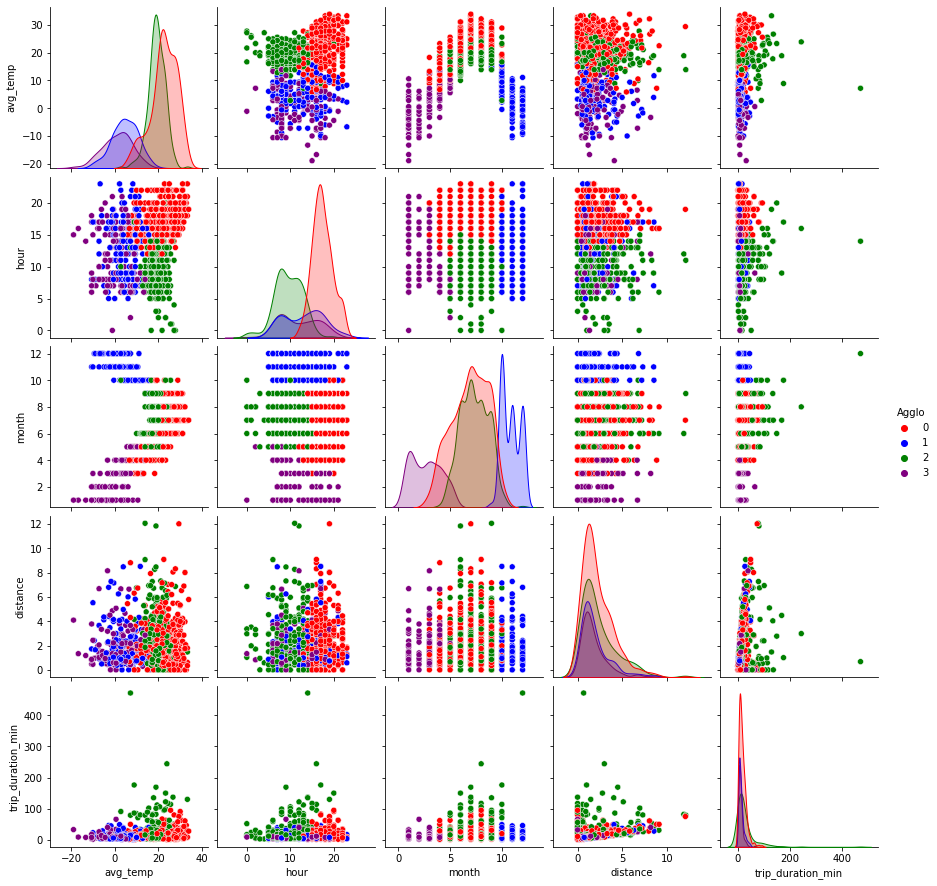

In [27]:
sns.pairplot(data=z_scaled, hue="Agglo", palette=["red", "blue", "green", "purple"])

**PRINCIPAL COMPONENT ANALYSIS**

In [28]:
data2 = original_data[[
    "avg_temp",
    "hour",
    "month",
    "start_dist_centre",
    "end_dist_centre",
    #"bike_id",
    "distance",
    "trip_duration_min"
    ]].copy()

data2['avg_temp']=data2['avg_temp'].astype(float)
data2['hour']=data2['hour'].astype(float)
data2['month']=data2['month'].astype(float)
data2['start_dist_centre']=data2['start_dist_centre'].astype(float)
data2['end_dist_centre']=data2['end_dist_centre'].astype(float)
#data['bike_id']=data['bike_id'].astype(float)
data2['trip_duration_min']=data2['trip_duration_min'].astype(float)
data2['distance']=data2['distance'].astype(float)

#######
data2["distance"] = data2["distance"].fillna(0)
data2 = data2[np.isfinite(data2).all(1)]

##
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data2)
sample2 = data2.sample(n=1000)
data_scaled2 = scaler.transform(data2)
data_scaled_df2 = pd.DataFrame(data2, columns=data2.columns, index=data2.index)
# data_scaled_df.sort_values(by = "start_station_id", inplace = True)
data_scaled_df2.head()

,avg_temp,hour,month,start_dist_centre,end_dist_centre,distance,trip_duration_min
0,2.5,0.0,1.0,1.116084,2.353592,1.787966,6.0
1,2.5,0.0,1.0,0.491839,0.791856,0.942257,7.0
2,2.5,0.0,1.0,3.810309,5.421507,2.717795,14.0
3,2.5,0.0,1.0,7.627652,2.447924,5.876562,30.0
4,2.5,0.0,1.0,1.679940,1.486920,0.951965,6.0


In [29]:
from sklearn.decomposition import PCA
# Create the PCA object
pca = PCA(n_components=5)

# Fit the PCA object to the data
pca.fit(data_scaled2)

# Transform the data using the PCA object
X_pca = pca.transform(data_scaled2)

In [30]:
print(pca.components_)
print(list(data_scaled_df2.columns)[:])

[[ 0.00654937  0.00927714 -0.00448541  0.50184898  0.59988283  0.62075924
   0.05288745]
 [ 0.69975374  0.59726094  0.30570264 -0.01574251 -0.01019336 -0.0123334
   0.24426648]
 [-0.03687285  0.41588007 -0.88684833 -0.01897782 -0.00511627 -0.00871278
   0.19677895]
 [-0.07867502 -0.32476998  0.06065102 -0.05537272 -0.01913099 -0.010598
   0.93867551]
 [-0.70782799  0.60303779  0.34081278 -0.05360265  0.02560027  0.00888476
   0.12475594]]
['avg_temp', 'hour', 'month', 'start_dist_centre', 'end_dist_centre', 'distance', 'trip_duration_min']


In [31]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.28614579 0.18785599 0.14399868 0.14019945 0.09906146]
0.8572613658855394


In [32]:
X_pca_df = pd.DataFrame(X_pca, columns = ["First PC", "Second PC", "Third PC", "Fourth PC", "Fifth PC"])


In [33]:
X_pca_df

,First PC,Second PC,Third PC,Fourth PC,Fifth PC
0,-0.093042,-3.494576,0.857010,0.591240,-1.645599
1,-0.113949,-3.487789,0.862464,0.616523,-1.642458
2,-0.032922,-3.445117,0.896736,0.782662,-1.620809
3,0.018373,-3.344890,0.977059,1.168752,-1.572719
4,-0.101415,-3.494476,0.856994,0.591091,-1.646401
...,...,...,...,...,...
3817999,-0.009842,0.426047,-0.785937,-0.354248,3.165948
3818000,-0.079829,0.465621,-0.754105,-0.205208,3.185030
3818001,-0.083242,0.357638,-0.841143,-0.619379,3.129684
3818002,-0.083242,0.357638,-0.841143,-0.619379,3.129684


In [34]:
from sklearn.preprocessing import StandardScaler

scaler3 = StandardScaler()
scaler3.fit(X_pca_df)
sample33 = X_pca_df.sample(n=1000)
data_scaled33 = scaler3.transform(sample33)
data_scaled_df33 = pd.DataFrame(sample33, columns=X_pca_df.columns, index=sample33.index)
# data_scaled_df.sort_values(by = "start_station_id", inplace = True)
data_scaled_df33.head()

,First PC,Second PC,Third PC,Fourth PC,Fifth PC
3666834,-0.106370,-1.265414,-2.088825,0.302542,1.179071
3661211,-0.035064,0.460580,-0.701691,-0.561805,2.260224
299581,0.052678,-0.840243,1.771019,-0.039019,0.725045
210456,-0.088078,-2.328065,1.753031,-0.319030,2.056044
3523630,-0.029490,-0.000218,-0.994883,-0.497674,1.900244


In [35]:
data_scaled33.shape

(1000, 5)

C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

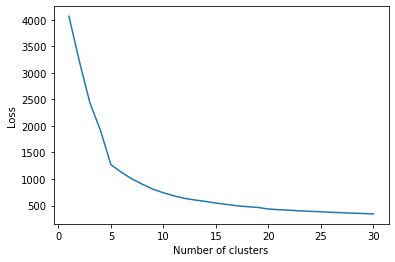

In [36]:
pca_clusters = []
pca_losses = []

for i in range(30):
    model = KMeans(n_clusters=i+1)
    model.fit(data_scaled33)
    pca_clusters.append(i+1)
    pca_losses.append(model.inertia_)
    
plt.plot(pca_clusters, pca_losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

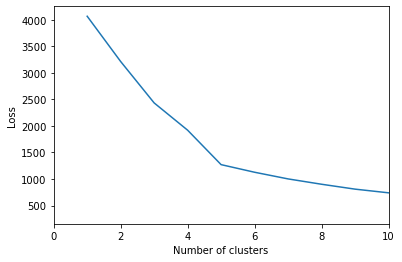

In [37]:
plt.plot(pca_clusters, pca_losses)
plt.xlim([0,10])
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

In [38]:
# elbow = 6 

In [39]:
pca_three_means = KMeans(n_clusters=6)

In [40]:
pca_three_means.fit(X_pca_df)


C:\Users\Thanh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [41]:
X_pca_df["Cluster"] = pca_three_means.predict(X_pca_df)
#sns.lmplot(x="First PC", y="Second PC", hue="Cluster", data=X_pca_df, fit_reg=False)
#sns.lmplot(x="First PC", y="Second PC", hue="Species", data=X_pca_df, fit_reg=False)

In [42]:
X_pca_df

,First PC,Second PC,Third PC,Fourth PC,Fifth PC,Cluster
0,-0.093042,-3.494576,0.857010,0.591240,-1.645599,0
1,-0.113949,-3.487789,0.862464,0.616523,-1.642458,0
2,-0.032922,-3.445117,0.896736,0.782662,-1.620809,0
3,0.018373,-3.344890,0.977059,1.168752,-1.572719,0
4,-0.101415,-3.494476,0.856994,0.591091,-1.646401,0
...,...,...,...,...,...,...
3817999,-0.009842,0.426047,-0.785937,-0.354248,3.165948,3
3818000,-0.079829,0.465621,-0.754105,-0.205208,3.185030,3
3818001,-0.083242,0.357638,-0.841143,-0.619379,3.129684,3
3818002,-0.083242,0.357638,-0.841143,-0.619379,3.129684,3


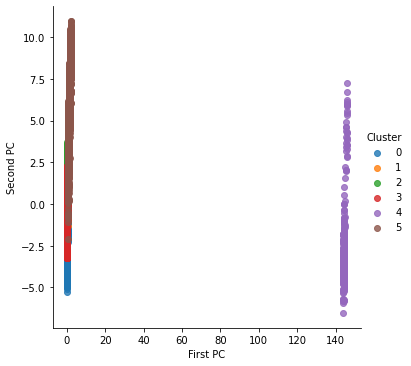

In [43]:
sns.lmplot(x="First PC", y="Second PC", hue="Cluster", data=X_pca_df, fit_reg=False)